In [ ]:
# Initial Setup.
import pandas as pd
import re
import numpy as np
import math
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Mastodon_SaiGinny/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
'''
import glob
file_list = glob.glob(path+'data_collection/*normalized*.csv')

df_list = [pd.read_csv(file) for file in file_list]

combined_df = pd.concat(df_list, ignore_index=True)
'''

"\nimport glob\nfile_list = glob.glob(path+'data_collection/*normalized*.csv')\n\ndf_list = [pd.read_csv(file) for file in file_list]\n\ncombined_df = pd.concat(df_list, ignore_index=True)\n"

In [ ]:
combined_df = pd.read_pickle(path+'mapping_mastodon_twitter_with_descriptions_final.pkl')

In [ ]:
combined_df.shape

(3853, 21)

In [ ]:
combined_df.columns

Index(['id', 'username', 'acct', 'discipline', 'twitter_handle',
       'collected_twitter_username', 'collected_twitter_name',
       'pinned_tweet_id', 'most_recent_tweet_id', 'twitter_user_id',
       'protected', 'followers_count', 'following_count', 'tweet_count',
       'like_count', 'twitter_user_description', 'twitter_user_created',
       'tweet_id', 'history', 'created_at', 'text'],
      dtype='object')

In [ ]:
role=pd.read_csv(path+'mastodon_stats.csv')

In [ ]:
merged_df = pd.merge(combined_df, role, left_on='acct', right_on='acct', how='inner')

In [ ]:
merged_df.shape

(3853, 24)

In [ ]:
conditions = [
    (merged_df['protected'] ==True),
    (merged_df['protected'] ==False) & (merged_df['created_at']<='2023-01-01T00:00:00.000Z'),
    (merged_df['protected'] ==False) & (merged_df['created_at']<='2023-11-01T00:00:00.000Z') & ((merged_df['created_at']>'2023-01-01T00:00:00.000Z')),
    (merged_df['protected'] ==False) & (merged_df['created_at']>'2023-11-01T00:00:00.000Z')
]

choices = ['Locked', 'Inactive', 'Semi-active','Active']

merged_df['twitter'] = np.select(conditions, choices, default='Unknown')

In [ ]:
merged_df=merged_df.loc[merged_df['twitter']!='Unknown']

In [ ]:
merged_df['twitter'].value_counts()

,count
twitter,
Active,2496
Locked,324
Semi-active,220
Inactive,91


In [ ]:
contingency_table = pd.crosstab(merged_df['twitter'], merged_df['mastodon'])
contingency_table

mastodon,Long_Term,One_Time,Persistent,Short_Term
twitter,,,,
Active,684,374,860,578
Inactive,21,12,39,19
Locked,82,51,140,51
Semi-active,43,39,96,42


In [ ]:
merged_df.columns

Index(['id', 'username', 'acct', 'discipline', 'twitter_handle',
       'collected_twitter_username', 'collected_twitter_name',
       'pinned_tweet_id', 'most_recent_tweet_id', 'twitter_user_id',
       'protected', 'followers_count', 'following_count', 'tweet_count',
       'like_count', 'twitter_user_description', 'twitter_user_created',
       'tweet_id', 'history', 'created_at', 'text', 'Unnamed: 0',
       'status_diff_days', 'mastodon', 'twitter'],
      dtype='object')

In [ ]:
merged_df.head()

,id,username,acct,discipline,twitter_handle,collected_twitter_username,collected_twitter_name,pinned_tweet_id,most_recent_tweet_id,twitter_user_id,...,twitter_user_description,twitter_user_created,tweet_id,history,created_at,text,Unnamed: 0,status_diff_days,mastodon,twitter
0,,davidrypel,davidrypel@mastodon.online,Anthropologists,@rypeld,rypeld,David Rypel,,1841510048788283858,122120526,...,"(Queer) everyday security, politics of belongi...",2010-03-11T17:16:54.000Z,1841510048788283858,[1841510048788283858],2024-10-02T16:06:23.000Z,RT @UCLSSEES: Please join us for this roundtab...,3264,0,One_Time,Active
1,,gkountourides,gkountourides@fediscience.org,"Anthropologists, Qualitative Researchers",@gkountourides,GKountourides,Dr Gabriella Kountourides,,1844411043650691305,1200487274,...,Award winning science communicator 📣Statistici...,2013-02-20T10:52:21.000Z,1844411043650691305,[1844411043650691305],2024-10-10T16:13:54.000Z,"I cannot WAIT for lab grown meat. Meat, protei...",3980,226,Long_Term,Active
2,,hw,hw@fediscience.org,Anthropologists,@hwamee_oh,hwamee_oh,Hwamee Oh,,1841962016061235281,884125025057558528,...,Associate Professor @BrownUniversity. Brain Im...,2017-07-09T19:00:07.000Z,1841962016061235281,[1841962016061235281],2024-10-03T22:02:21.000Z,RT @david_berron: A lot has happened in the fi...,4200,321,Persistent,Active
4,,kerim,kerim@zirk.us,"Anthropologists, Asianists",@kerim,kerim,Kerim,,1840740734753779845,631846363,...,,2012-07-10T09:38:49.000Z,1840740734753779845,[1840740734753779845],2024-09-30T13:09:25.000Z,@adamkuruc_ Can’t wait till we’ll finish the v1!!,4912,337,Persistent,Active
5,,nilanjana,nilanjana@mas.to,"Anthropologists, Asianists",@_nilanjana_,_nilanjana_,Nilanjana Bhattacharjya,,1766113230609654051,14206768,...,,2008-03-24T11:36:49.000Z,NaN,NaN,NaN,NaN,5900,43,Short_Term,Locked


In [ ]:
import pandas as pd

username_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
description_pattern = r'\b(mastodon|mstdn|fediverse)\b'
exclude_pattern = r'bsky'

filtered_df = merged_df[
    (merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
     merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)) &
    ~merged_df['collected_twitter_name'].str.contains(exclude_pattern, na=False, case=False, regex=True)
]


merged_df['mention_mastodon'] = ((merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
     merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)) &
    ~merged_df['collected_twitter_name'].str.contains(exclude_pattern, na=False, case=False, regex=True))


filtered_df[['collected_twitter_name', 'twitter_user_description']]

<ipython-input-111-76548f4ef446>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)) &
<ipython-input-111-76548f4ef446>:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)) &


,collected_twitter_name,twitter_user_description
2,Hwamee Oh,Associate Professor @BrownUniversity. Brain Im...
12,Ronald Visser @RonaldVisser@akademienl.social,Roman Archaeology | Digital Archaeology | Dend...
13,Jeremy Huggett,Digital archaeologist;\nDucatista and 60's Tri...
15,Dr. Michelle I. Turner,Now on Mastodon @chaco_arch@scholar.social or ...
17,Shawn Graham @electricarchaeo@scholar.social,"Digital Archaeologist. Editor of Epoiesen, htt..."
...,...,...
3826,Izumi Fukunaga,"Associate professor at OIST, a neuroscientist ..."
3838,Dr. Irina Calin-Jageman,"Learning and Memory Neuroscientist, RNA Biolog..."
3844,Austin Soplata (@asoplata@neuromatch.social),Postdoctoral Researcher at EPFL-Blue Brain Pro...
3845,Alberto Antonietti - @aalpha@sigmoid.social,"Ph.D. in #BioEngineering, interested in #Neuro..."


In [ ]:
import pandas as pd

username_pattern = r'\b(bluesky|bsky)\b'
description_pattern = r'\b(bluesky|bsky)\b'


filtered_df = merged_df[
    merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
    merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)
]



merged_df['mention_bluesky'] = (
    merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
    merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)
)
filtered_df[['collected_twitter_name', 'twitter_user_description']]

<ipython-input-112-e3f83eada01a>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
<ipython-input-112-e3f83eada01a>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)
<ipython-input-112-e3f83eada01a>:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
<ipython-input-112-e3f83eada01a>:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['twitter_user_de

,collected_twitter_name,twitter_user_description
6,Resto Cruz @restocruz.bsky.social,Lecturer (Assistant Professor). 📝 on inheritan...
8,Prof Susan Oosthuizen,"Prof. (Em.) of Medieval Archaeology, Universit..."
40,@ethanmark.bsky.social,Japan/Indonesia/global historian@Leiden Univ. ...
50,nhungtuyettran@bsky.social,"Historian of gender, law, & religion in Southe..."
52,Manan Ahmed,Last seen here in July 2023. Find me on bluesk...
...,...,...
3795,JJ (Show the dots on the plots),Engineer working on motor control/learning & a...
3801,Tobias Rose,Vision & Motion. Stability & Plasticity. https...
3815,Anna Ciaunica @annaciaunica.bsky.social,Philosopher/Cognitive scientist |PI working on...
3820,Ken Miller,"Theoretical neuroscientist, Columbia Universit..."


In [ ]:
import pandas as pd

username_pattern = r'\b(threads)\b'
description_pattern = r'\b(threads)\b'


filtered_df = merged_df[
    merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
    merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)
]



merged_df['mention_threads'] = (
    merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
    merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)
)

len(filtered_df[['collected_twitter_name', 'twitter_user_description']])

<ipython-input-113-09bdbedeb460>:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
<ipython-input-113-09bdbedeb460>:9: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['twitter_user_description'].str.contains(description_pattern, na=False, case=False, regex=True)
<ipython-input-113-09bdbedeb460>:15: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['collected_twitter_name'].str.contains(username_pattern, na=False, regex=True) |
<ipython-input-113-09bdbedeb460>:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  merged_df['twitter_user_de

69

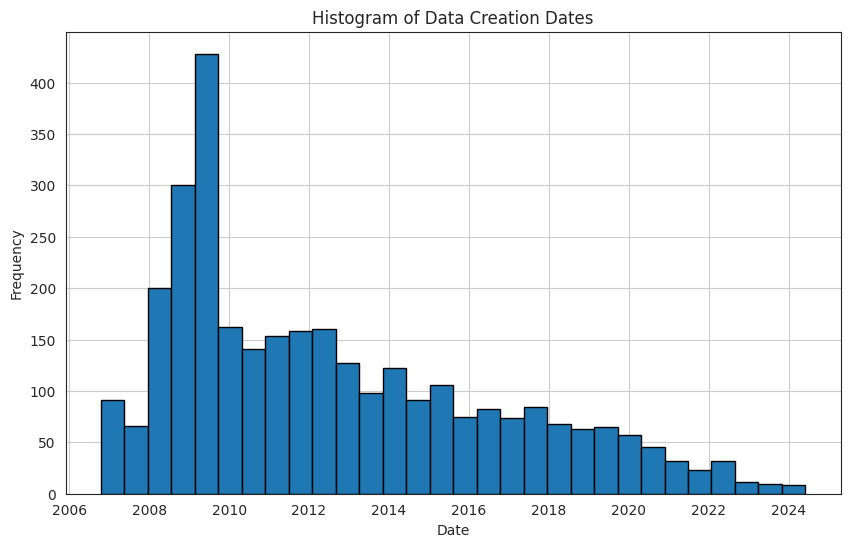

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df['twitter_user_created'] = pd.to_datetime(merged_df['twitter_user_created'], format='%Y-%m-%dT%H:%M:%S.%fZ')

plt.figure(figsize=(10, 6))
merged_df['twitter_user_created'].hist(bins=30, edgecolor='black')

plt.title('Histogram of Data Creation Dates')
plt.xlabel('Date')
plt.ylabel('Frequency')


plt.show()


<ipython-input-175-03ec2b084b61>:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar=plt.colorbar(sm, label='Like Count')


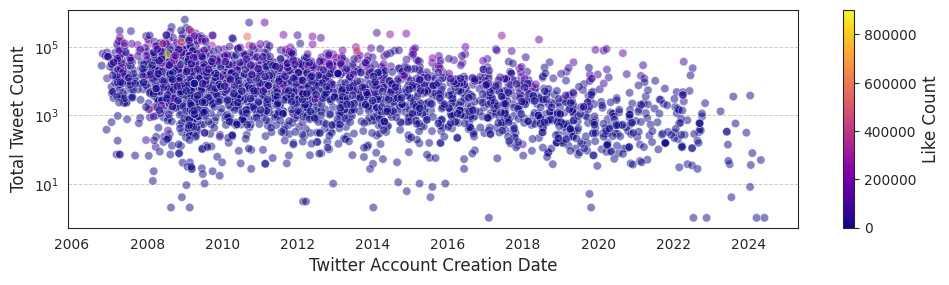

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


merged_df['twitter_user_created'] = pd.to_datetime(merged_df['twitter_user_created'], format='%Y-%m-%dT%H:%M:%S.%fZ')

merged_df['total_connections'] = merged_df['followers_count'] + merged_df['following_count']
sns.set_style("white")


plt.figure(figsize=(10, 3))
scatter_plot = sns.scatterplot(
    x='twitter_user_created',
    y='tweet_count',
    data=merged_df,
    hue='like_count',
    edgecolor='w',
    palette='plasma',
#    size='total_connections',
    sizes=(20, 200),
    legend=False,
    alpha=0.5,
    linewidth=0.5,
)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

plt.yscale('log')

scatter_plot.set_xlabel('Twitter Account Creation Date', fontsize=12)
scatter_plot.set_ylabel('Total Tweet Count', fontsize=12)

plt.tight_layout()
norm = plt.Normalize(merged_df['like_count'].min(), merged_df['like_count'].max())
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])
cbar=plt.colorbar(sm, label='Like Count')
cbar.set_label('Like Count', fontsize=12)  # Set label size for the colorbar
cbar.ax.tick_params(labelsize=10)

plt.show()


In [ ]:
!pip install upsetplot

/usr/local/lib/python3.10/dist-packages/upsetplot/data.py:303: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/

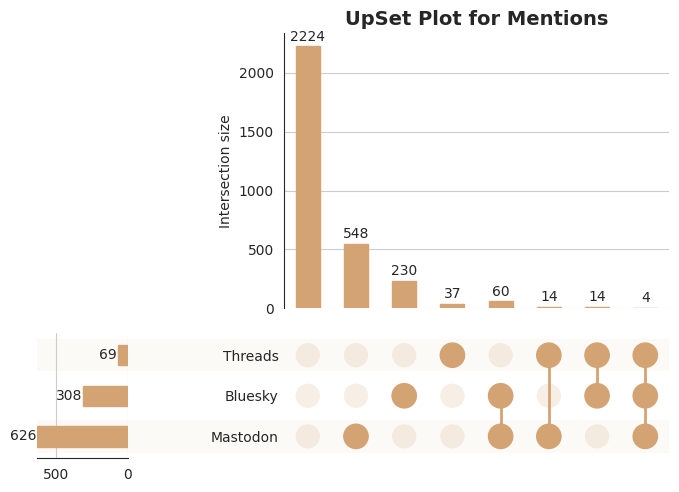

In [ ]:
import matplotlib.pyplot as plt
from upsetplot import UpSet, from_memberships
import pandas as pd


memberships = []
for i, row in merged_df.iterrows():
    membership = []
    if row['mention_mastodon']:
        membership.append('Mastodon')
    if row['mention_bluesky']:
        membership.append('Bluesky')
    if row['mention_threads']:
        membership.append('Threads')
    memberships.append(membership)

data_upset = from_memberships(memberships)

upset = UpSet(
    data_upset,
    subset_size='count',
    show_counts='%d',
    facecolor="#D4A373",
    element_size=50
)

upset.style_subsets(min_subset_size=1)
upset.plot()


plt.title("UpSet Plot for Mentions", fontsize=14, fontweight='bold')
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.show()

/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/usr/local/lib/python3.10/dist-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

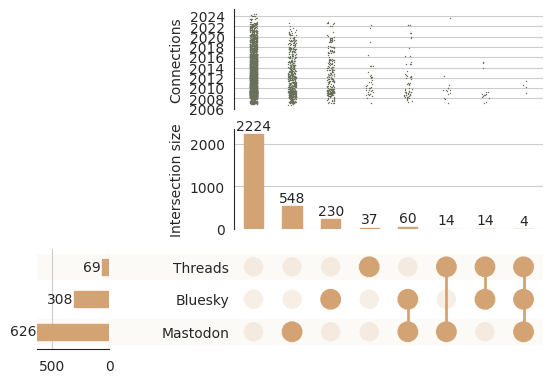

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet


combined_df_above_avg = merged_df[['mention_mastodon', 'mention_bluesky', 'mention_threads']]
combined_df_above_avg = combined_df_above_avg.rename(columns={
    'mention_mastodon': 'Mastodon',
    'mention_bluesky': 'Bluesky',
    'mention_threads': 'Threads'
})

combined_df = pd.concat([merged_df, combined_df_above_avg], axis=1)
combined_df = combined_df.set_index(list(combined_df_above_avg.columns))

combined_df = combined_df.assign(Connections=combined_df['twitter_user_created'])


upset = UpSet(
    combined_df,
    subset_size="count",
    intersection_plot_elements=3,
    facecolor="#D4A373",
    element_size=40,
    show_counts='%d',
)


upset.add_catplot(
    kind="strip",
    value="Connections",
    color="#6B705C",
    s=1
)

upset.plot()

#plt.yscale('log')


plt.subplots_adjust(left=0.2, bottom=0.2)
plt.show()


In [ ]:
mastodon_connection=pd.read_csv(path+'network_data/total_network-nodeset-Agent.csv')

In [ ]:
merged_df.shape

(3131, 29)

In [ ]:
final = pd.merge(merged_df, mastodon_connection, left_on='acct', right_on='acct', how='inner')

In [ ]:
final.shape

(3131, 37)

In [ ]:
final.columns

Index(['id', 'username', 'acct', 'discipline', 'twitter_handle',
       'collected_twitter_username', 'collected_twitter_name',
       'pinned_tweet_id', 'most_recent_tweet_id', 'twitter_user_id',
       'protected', 'followers_count', 'following_count', 'tweet_count',
       'like_count', 'twitter_user_description', 'twitter_user_created',
       'tweet_id', 'history', 'created_at', 'text', 'Unnamed: 0',
       'status_diff_days', 'mastodon', 'twitter', 'mention_mastodon',
       'mention_bluesky', 'mention_threads', 'total_connections', 'Node ID',
       'Centrality, In-Degree', 'Centrality, Out-Degree',
       'Centrality, Total-Degree', 'Centrality, Total-Degree_normalized',
       'Density, Clustering Coefficient', 'field', 'server'],
      dtype='object')

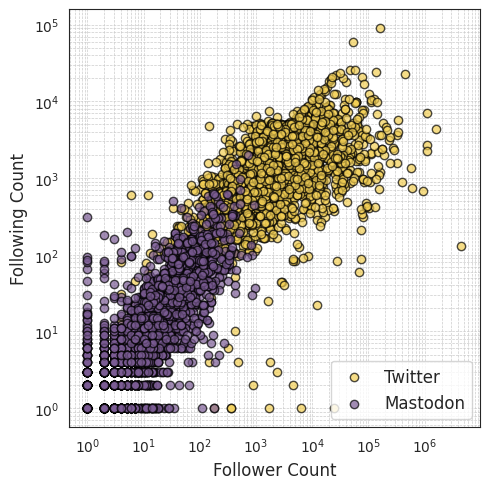

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

plt.scatter(final['followers_count'], final['following_count'],
            c='#F3CF54', label='Twitter', alpha=0.7, edgecolor='k')

plt.scatter(final['Centrality, In-Degree'], final['Centrality, Out-Degree'],
            color='#7B5C94', label='Mastodon', alpha=0.7, edgecolor='k')

plt.xlabel('Follower Count',size=12)
plt.ylabel('Following Count',size=12)

plt.xscale('log')
plt.yscale('log')
plt.legend(loc='lower right', fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.5)


plt.tight_layout()


plt.show()


In [ ]:
print(final.loc[final['twitter'] == 'Inactive']['followers_count'].mean(),
final.loc[final['twitter'] == 'Inactive']['followers_count'].std(),
final.loc[final['twitter'] == 'Inactive']['following_count'].mean(),
final.loc[final['twitter'] == 'Inactive']['following_count'].std())

2041.4615384615386 5203.501093404309 814.5604395604396 1062.388025041188


In [ ]:
print(final.loc[final['twitter'] == 'Active']['followers_count'].mean(),
final.loc[final['twitter'] == 'Active']['followers_count'].std(),
final.loc[final['twitter'] == 'Active']['following_count'].mean(),
final.loc[final['twitter'] == 'Active']['following_count'].std())

13208.759615384615 108495.53626589772 1989.0665064102564 3087.6781584232467


In [ ]:
print(final.loc[final['twitter'] == 'Semi-active']['followers_count'].mean(),
final.loc[final['twitter'] == 'Semi-active']['followers_count'].std(),
final.loc[final['twitter'] == 'Semi-active']['following_count'].mean(),
final.loc[final['twitter'] == 'Semi-active']['following_count'].std())

4467.277272727273 19152.8984155738 1137.5636363636363 1263.8735091271888


In [ ]:
print(final.loc[final['twitter'] == 'Locked']['followers_count'].mean(),
final.loc[final['twitter'] == 'Locked']['followers_count'].std(),
final.loc[final['twitter'] == 'Locked']['following_count'].mean(),
final.loc[final['twitter'] == 'Locked']['following_count'].std())

6347.101851851852 31583.976441585997 1859.716049382716 2300.910067546463
